# TF-IDF and Cosine Similarity

In [1]:
# Load for Jupyter Notebook
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('/home/elenaruiz/Documents/FNC')
import pandas as pd 
import numpy as np 
from src.utils import io
from sklearn.feature_extraction.text import TfidfTransformer
from src.fake_news_detector.core.encoders import tfidf as t
from src.fake_news_detector.core.classificators import SupportVectorMachine as svm_controller

## 1. Import `dataset_content.json`

In [2]:
articles = io.read_json_file('/home/elenaruiz/Documents/FNC/src/data/dataset_content.json')
df = pd.DataFrame(data=articles['articles']) # Put in pandas dataframe

In [3]:
def join_lists(dataset, word_lists):
    result = []
    for _, row in dataset.iterrows():
        text_join = ""
        for feature in word_lists:
            doc_list = row[feature]
            text_join += ' '.join(doc_list)
        result.append(text_join)
    return result  

In [4]:
dataset = pd.DataFrame()
dataset['text'] = join_lists(df, ['all_word'])
dataset['label'] = df['fake']*1
dataset.head()

,text,label
0,find corpse vegetarian restaurant Bangkok find...,1
1,switzerland warn authorize extradition politic...,1
2,navarre censor Songs Amaral Shakira song Madma...,1
3,woman pretend blind years greet people Now tru...,1
4,arrested ejaculate boss coffee last four years...,1


In [5]:
## 2. Split datasets

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(dataset, test_size=0.2, random_state=42)

## 3. Create vocabulary

In [7]:
cv = CountVectorizer()
X_train_counts = cv.fit_transform(dataset['text'].values)

In [8]:
# Split by type of documents
df_train_real = df_train.loc[df_train['label'] == 0]
df_train_fake = df_train.loc[df_train['label'] == 1]

In [9]:
cv_train_real = cv.transform(df_train_real['text'])
cv_train_fake = cv.transform(df_train_fake['text'])
print(cv_train_real.shape, cv_train_fake.shape)

(52, 6713) (57, 6713)


## 4. Create TF-IDF models

In [10]:
# FAKE
tf_transformer_fake = TfidfTransformer(use_idf=True).fit(cv_train_fake)
tf_train_fake = tf_transformer_fake.transform(cv_train_fake)
tf_train_fake.shape

(57, 6713)

In [11]:
# REAK
tf_transformer_real = TfidfTransformer(use_idf=True).fit(cv_train_real)
tf_train_real = tf_transformer_real.transform(cv_train_real)
tf_train_real.shape

(52, 6713)

### 4.1 Fake news relevant words
We want to get the top relevant words of Fake News documents by the TF-IDF create, so we compute from fake news text to tfidf weights.

In [46]:
results, top_fake_words = t.get_topn_relevant_words(cv, tf_train_fake, 600)
results

{'rice': 0.689,
 'cheese': 0.637,
 'dog': 0.624,
 'restaurant': 0.5,
 'ikea': 0.5,
 'switzerland': 0.481,
 'crocodiles': 0.48,
 'sexual': 0.458,
 'foreign': 0.442,
 'songs': 0.438,
 'cor': 0.435,
 'wax': 0.428,
 'guitar': 0.424,
 'day': 0.155,
 'water': 0.152,
 'beach': 0.41,
 'echenique': 0.41,
 'libya': 0.409,
 'semen': 0.405,
 'store': 0.4,
 'prisoners': 0.379,
 'alejandro': 0.395,
 'blind': 0.39,
 'museum': 0.385,
 'pastor': 0.384,
 'cold': 0.383,
 'women': 0.202,
 'drivers': 0.192,
 'use': 0.149,
 'military': 0.373,
 'crush': 0.371,
 'feminist': 0.37,
 'ugly': 0.368,
 'pp': 0.366,
 'guindos': 0.36,
 'melilla': 0.359,
 'police': 0.153,
 'forest': 0.355,
 'minimum': 0.354,
 'control': 0.206,
 'vallecas': 0.346,
 'office': 0.344,
 'abedi': 0.341,
 'children': 0.161,
 'feminism': 0.34,
 'cents': 0.337,
 'airline': 0.337,
 'muslim': 0.324,
 'que': 0.163,
 'wage': 0.322,
 'madrid': 0.14,
 'families': 0.321,
 'extradition': 0.321,
 'flag': 0.314,
 'vagina': 0.314,
 'parent': 0.314,
 'ger

### 4.2 Real news relevant words
It needs to do the same process but with real news articles.

In [47]:
results, top_real_words = t.get_topn_relevant_words(cv, tf_train_real, 600)
results

{'bitcoin': 0.766,
 'mw': 0.578,
 'columbus': 0.495,
 'attack': 0.478,
 'purchase': 0.264,
 'bbva': 0.406,
 'maroto': 0.442,
 'vox': 0.151,
 'education': 0.437,
 'bettong': 0.426,
 'degree': 0.423,
 'valeria': 0.418,
 'frb': 0.414,
 'burst': 0.414,
 'passengers': 0.409,
 'calviño': 0.406,
 'manicure': 0.4,
 'listen': 0.399,
 'operations': 0.382,
 'sesame': 0.379,
 'netflix': 0.355,
 'price': 0.198,
 'catalonia': 0.353,
 'borrell': 0.351,
 'waistcoats': 0.351,
 'liceu': 0.349,
 'conservatory': 0.349,
 'statue': 0.347,
 'bet': 0.344,
 'liter': 0.341,
 'abascal': 0.134,
 'choke': 0.333,
 'congress': 0.244,
 'death': 0.165,
 'survivors': 0.326,
 'political': 0.324,
 'motion': 0.324,
 'washington': 0.323,
 'panda': 0.323,
 'giant': 0.323,
 'syria': 0.321,
 'ambulances': 0.321,
 'cuba': 0.32,
 'movistar': 0.319,
 'workers': 0.318,
 'yellow': 0.318,
 'authority': 0.317,
 'january': 0.315,
 'unemployment': 0.311,
 'artists': 0.305,
 'disinformation': 0.305,
 'hathaway': 0.303,
 'moreno': 0.303

In [48]:
# ENCODED DOCUMENTS REFERENCE
cv_top_real_words = cv.transform([' '.join(top_real_words)])
cv_top_fake_words = cv.transform([' '.join(top_fake_words)])

## 5 Compute cosine similarity

In [49]:
def compute_similarity(dataset,cv_model, cv_top_real_words, cv_top_fake_words):
    dataset['cos_fake'] = dataset['label']*0.000000000005
    dataset['cos_real'] = dataset['label']*0.000000000005
    for index, row in dataset.iterrows():
        to_number = cv_model.transform([row['text']])
        cosine_sim_fake = t.get_cosine_similarity(cv_top_fake_words, to_number)
        cosine_sim_real = t.get_cosine_similarity(cv_top_real_words, to_number)
        dataset.at[index,'cos_fake'] = cosine_sim_fake[0]
        dataset.at[index,'cos_real'] = cosine_sim_real[0]

In [50]:
# TRAIN DATASET
compute_similarity(df_train,cv, cv_top_real_words, cv_top_fake_words)
df_train[['cos_real', 'cos_fake']].head()

,cos_real,cos_fake
10,0.067576,0.154907
130,0.165752,0.147831
51,0.030970,0.108463
11,0.098160,0.142764
114,0.086762,0.141631


In [51]:
# TRAIN DATASET
compute_similarity(df_test,cv, cv_top_real_words, cv_top_fake_words)
df_test[['cos_real', 'cos_fake']].head()

,cos_real,cos_fake
105,0.050026,0.066894
104,0.128939,0.114414
12,0.092189,0.153135
26,0.081042,0.125167
123,0.155622,0.072462


## 6. Classification

In [52]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from src.fake_news_detector.core.classificators import SupportVectorMachine as s
from src.fake_news_detector.core.classificators import helpers

### 6.2 Compute cosine similarity in test

In [53]:
X_train_tf = df_train[['cos_real', 'cos_fake']].values
Y_train = df_train['label'].values
Y_test = df_test['label'].values
X_test_tf = df_test[['cos_real', 'cos_fake']].values

rbf_values = svm_controller.svc_param_selection(X_train_tf, Y_train, 2, 'rbf')
linear_values = svm_controller.svc_param_selection(X_train_tf, Y_train, 2, 'linear')
poly_values = svm_controller.svc_param_selection(X_train_tf, Y_train, 2, 'poly')
sigmoid_values = svm_controller.svc_param_selection(X_train_tf, Y_train, 2, 'sigmoid')

/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [54]:
models = {}
models['rbf'] = svm.SVC(kernel='rbf', C= rbf_values['C'], gamma=rbf_values['gamma'])
models['linear']  = svm.SVC(kernel='linear', C= linear_values['C'], gamma=linear_values['gamma'])
models['poly']  = svm.SVC(kernel='poly',C=poly_values['C'], gamma=poly_values['gamma'])
models['sigmoid'] = svm.SVC(kernel='sigmoid', C=sigmoid_values['C'], gamma=sigmoid_values['gamma'])

In [55]:
scores = s.run_models(models, X_train_tf, Y_train, X_test_tf, Y_test)
for model in scores:
    print('For model', model)
    print('Training score: {}. Test score: {}'.format(scores[model]['train'],scores[model]['test']))

For model rbf
Training score: 0.981651376146789. Test score: 0.75
For model linear
Training score: 0.981651376146789. Test score: 0.75
For model poly
Training score: 0.5229357798165137. Test score: 0.4642857142857143
For model sigmoid
Training score: 0.981651376146789. Test score: 0.75


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


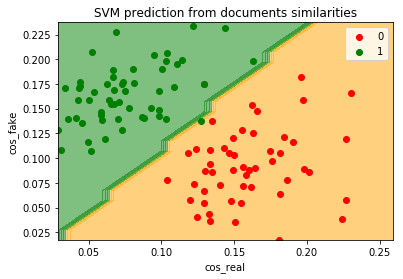

In [56]:
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
X_set, y_set = X_train_tf, Y_train

aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, models['rbf'].predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM prediction from documents similarities')
plt.xlabel('cos_real')
plt.ylabel('cos_fake')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


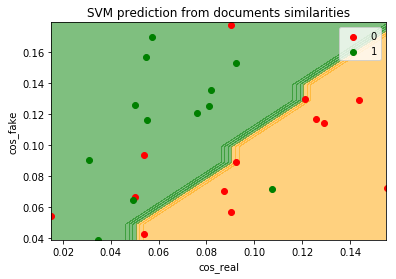

In [57]:
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap
X_set, y_set = X_test_tf, Y_test

aranged_pc1 = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_pc2 = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)

X1, X2 = np.meshgrid(aranged_pc1, aranged_pc2)
plt.contourf(X1, X2, models['rbf'].predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('orange', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM prediction from documents similarities')
plt.xlabel('cos_real')
plt.ylabel('cos_fake')
plt.legend()
plt.show()

### 6.1 Get optimal top_n words to classify with SVM

After show the process of how create two list of relevant words for each type of news, it is now implement on function `get_relevant_word_lists` which return both lists, from real and from fake. The important input for the function is `top_n` where will be variable and test on SVM models to see with which value the model can classify better the articles.

In [41]:
top_n_values = list(range(50, 4000, 50))

y_train = df_train['label'].values
y_test = df_test['label'].values
X_train = df_train[['cos_real', 'cos_fake']].values
X_test = df_test[['cos_real', 'cos_fake']].values
    
all_scores = []
for top_n in top_n_values:
    res, top_real_words = t.get_topn_relevant_words(cv, tf_train_real, top_n)
    res, top_fake_words = t.get_topn_relevant_words(cv, tf_train_fake, top_n)
    # Encode top words
    cv_top_real_words = cv.transform([' '.join(top_real_words)])
    cv_top_fake_words = cv.transform([' '.join(top_fake_words)])
    
    # Cosine similarity of train
    compute_similarity(df_train, cv, cv_top_real_words, cv_top_fake_words)
    # Cosine similarity of text
    compute_similarity(df_test, cv, cv_top_real_words, cv_top_fake_words)
    
    # Update X values
    X_train = df_train[['cos_real', 'cos_fake']].values
    X_test = df_test[['cos_real', 'cos_fake']].values
    # Run SVM
    scores = svm_controller.run_optimals_models(X_train, y_train, X_test, y_test, False)
    scores.append(top_n) 
    all_scores.append(scores)

/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib

/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib

/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/elenaruiz/Documents/FNC/env/lib

In [44]:
df_scores = pd.DataFrame(data=all_scores, columns=['kernel_training', 'training', 'kernel_validation', 'validation', 'top_n'])
df_scores.sort_values(['validation'], ascending=[False])

,kernel_training,training,kernel_validation,validation,top_n
10,rbf,0.981651,linear,0.750000,550
11,rbf,0.981651,rbf,0.750000,600
12,rbf,0.981651,rbf,0.750000,650
58,rbf,0.981651,rbf,0.692308,2950
59,rbf,0.981651,rbf,0.692308,3000
60,rbf,0.981651,rbf,0.692308,3050
61,linear,0.981651,rbf,0.692308,3100
62,rbf,0.981651,rbf,0.692308,3150
63,linear,0.981651,rbf,0.692308,3200
9,rbf,0.972477,linear,0.666667,500
